Name: Syalista Galuh Nadira

Student ID: 2702346361

Class: LF09

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import warnings
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import plot_importance
from sklearn.datasets import make_classification
from sklearn.metrics.pairwise import cosine_similarity

### 1. Exploratory Data Analysis (EDA)

In [2]:
df2 = pd.read_csv("2A.tsv", delimiter="\t")

df2.head()

,Customer ID,Birth Date,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,1969/03/05,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,2005/07/01,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,1974/12/01,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,2003/11/21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,1979/09/13,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [3]:
df2.tail()

,Customer ID,Birth Date,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
3895,3896,1984/02/23,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,1972/02/11,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,1978/05/02,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,1980/03/30,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly
3899,3900,1972/09/23,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Bank Transfer,Store Pickup,No,No,33,Venmo,Quarterly


In [4]:
df2.shape

(3900, 19)

In [5]:
df2.columns

Index(['Customer ID', 'Birth Date', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

Based on my thinking, the variables *Customer ID*, *Birth Date*, *Size*, *Color*, *Review Rating*, *Shipping Type*, *Payment Method*, and *Item Purchased* do not play a significant role in clustering customers to identify what kind of product promotions would be suitable for them. Therefore, I will drop these columns.

In [6]:
df2.drop(columns=['Customer ID', 'Birth Date', 'Size', 'Color', 'Review Rating', 'Shipping Type', 'Item Purchased', 'Payment Method'], inplace=True)

In [7]:
# The descriptive statistics for numerical variables
df2.describe()

,Purchase Amount (USD),Previous Purchases
count,3900.000000,3900.000000
mean,59.764359,25.351538
std,23.685392,14.447125
min,20.000000,1.000000
25%,39.000000,13.000000
50%,60.000000,25.000000
75%,81.000000,38.000000
max,100.000000,50.000000


In [8]:
# Overview of data
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Gender                    3900 non-null   object
 1   Category                  3900 non-null   object
 2   Purchase Amount (USD)     3900 non-null   int64 
 3   Location                  3900 non-null   object
 4   Season                    3900 non-null   object
 5   Subscription Status       3900 non-null   object
 6   Discount Applied          3900 non-null   object
 7   Promo Code Used           3900 non-null   object
 8   Previous Purchases        3900 non-null   int64 
 9   Preferred Payment Method  3900 non-null   object
 10  Frequency of Purchases    3900 non-null   object
dtypes: int64(2), object(9)
memory usage: 335.3+ KB


There is no missing value in this dataset.

**Checking value formats in categorical variables**

In [9]:
categorical_df2 = ['Gender', 'Category', 'Location', 'Season', 'Subscription Status', 'Discount Applied', 'Promo Code Used', 'Preferred Payment Method', 'Frequency of Purchases']

for col in categorical_df2:
  print(df2[col].value_counts())
  print()

Gender
Male      2642
Female    1231
f           17
M           10
Name: count, dtype: int64

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
New York          87
Nevada            87
Nebraska          87
Delaware          86
Maryland          86
Vermont           85
Louisiana         84
North Dakota      83
West Virginia     81
Missouri          81
New Mexico        81
Mississippi       80
Kentucky          79
Arkansas          79
Georgia           79
Indiana           79
Connecticut       78
North Carolina    78
Maine             77
Ohio              77
Virginia          77
Texas             77
Tennessee         77
South Carolina    76
Oklahoma          75
Wisconsin         75
Colorado          75
Oregon            74
Pennsylvania      74
Michigan          73
Washington        73
Alas

All column values are uniform, except for the "Gender" column, its values are inconsistent. We must replace with a uniform format.

In [10]:
# f -> Female
df2['Gender'].replace({'f':'Female'}, inplace = True)

# M -> Male
df2['Gender'].replace({'M':'Male'}, inplace = True)

/tmp/ipython-input-3511252100.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Gender'].replace({'f':'Female'}, inplace = True)


**Encoding categorical variables**

In [11]:
# Label encoding for Gender, Subscription Status, Promo Code Used, Discount Applied
cols_encode2 = ['Gender', 'Subscription Status', 'Promo Code Used', 'Discount Applied']

from sklearn import preprocessing

df2_labelenc = df2[cols_encode2].copy() # create a copy of the original df for encoding

for col in cols_encode2:
    label_enc2 = preprocessing.LabelEncoder()
    df2_labelenc[col + '_enc'] = label_enc2.fit_transform(df2_labelenc[col])

df2_labelenc = df2_labelenc.drop(columns=['Gender', 'Subscription Status', 'Promo Code Used', 'Discount Applied'])

In [12]:
df2_labelenc.head()

,Gender_enc,Subscription Status_enc,Promo Code Used_enc,Discount Applied_enc
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1


In [13]:
# Ordinal encoding for Frequency of Purchases
df2_FoP = [
    ["Annually", "Every 3 Months", "Quarterly", "Monthly", "Fortnightly", "Bi-Weekly", "Weekly"]
]

df2_fopenc = df2[['Frequency of Purchases']].copy()

ordinal_enc = OrdinalEncoder(categories=df2_FoP)
df2_fopenc['Frequency of Purchases_enc'] = ordinal_enc.fit_transform(df2_fopenc[['Frequency of Purchases']]) + 1

df2_fopenc = df2_fopenc.drop(columns=['Frequency of Purchases'])

# mapping
print("Frequency of Purchases")
for index, label in enumerate(df2_FoP[0]):
    print(f"{label} -> {index+1}")
print()

Frequency of Purchases
Annually -> 1
Every 3 Months -> 2
Quarterly -> 3
Monthly -> 4
Fortnightly -> 5
Bi-Weekly -> 6
Weekly -> 7



In [14]:
df2_fopenc.head()

,Frequency of Purchases_enc
0,5.0
1,5.0
2,7.0
3,7.0
4,1.0


Next, I will group the values with high variation, starting with the *Location* column, to make the data simpler. Since *Location* has many unique values, I will cluster them into four broader regional groups: West US, East US, South and Midwest US, and Midwest & Mountain.

**West US**:
Montana, California, Idaho, Nevada, Alaska, Oregon, Washington, Hawaii, Arizona, Utah, Wyoming

**East US**:
Vermont, Delaware, Maryland, Connecticut, New Hampshire, New York, Maine, New Jersey, Massachusetts, Rhode Island

**South and Midwest US**:
Alabama, Arkansas, Georgia, Kentucky, Louisiana, Mississippi, North Carolina, South Carolina, Tennessee, Texas, Virginia, West Virginia, Florida

**Midwest & Mountain US**:
Illinois, Minnesota, Nebraska, North Dakota, Missouri, Indiana, Iowa, Wisconsin, Ohio, Michigan, Colorado, Kansas, Oklahoma, South Dakota, New Mexico

In [15]:
location_groups = {
    'Montana': 'West US', 'California': 'West US', 'Idaho': 'West US', 'Nevada': 'West US', 'Alaska': 'West US', 'Oregon': 'West US', 'Washington': 'West US', 'Hawaii': 'West US', 'Arizona': 'West US', 'Utah': 'West US', 'Wyoming': 'West US',
    'Vermont': 'East US', 'Delaware': 'East US', 'Maryland': 'East US', 'Connecticut': 'East US', 'New Hampshire': 'East US', 'New York': 'East US', 'Maine': 'East US', 'New Jersey': 'East US', 'Massachusetts': 'East US', 'Rhode Island': 'East US',
    'Alabama': 'South and Midwest US', 'Arkansas': 'South and Midwest US', 'Georgia': 'South and Midwest US', 'Kentucky': 'South and Midwest US', 'Louisiana': 'South and Midwest US', 'Mississippi': 'South and Midwest US', 'North Carolina': 'South and Midwest US', 'South Carolina': 'South and Midwest US', 'Tennessee': 'South and Midwest US', 'Texas': 'South and Midwest US', 'Virginia': 'South and Midwest US', 'West Virginia': 'South and Midwest US', 'Florida': 'South and Midwest US',
    'Illinois': 'Midwest & Mountain US', 'Minnesota': 'Midwest & Mountain US', 'Nebraska': 'Midwest & Mountain US', 'North Dakota': 'Midwest & Mountain US', 'Missouri': 'Midwest & Mountain US', 'Indiana': 'Midwest & Mountain US', 'Iowa': 'Midwest & Mountain US', 'Wisconsin': 'Midwest & Mountain US', 'Ohio': 'Midwest & Mountain US', 'Michigan': 'Midwest & Mountain US', 'Colorado': 'Midwest & Mountain US', 'Kansas': 'Midwest & Mountain US', 'Oklahoma': 'Midwest & Mountain US', 'South Dakota': 'Midwest & Mountain US', 'New Mexico': 'Midwest & Mountain US'
}


df2['Location'] = df2['Location'].replace(location_groups)

In [16]:
# One hot encoding for Category, Location, Preferred Payment Method, and Season
onehot_cols2 = df2[['Category', 'Location', 'Season', 'Preferred Payment Method']]
onehot2 = OneHotEncoder()
df2_onehot = pd.DataFrame(onehot2.fit_transform(onehot_cols2).toarray(),columns=onehot2.get_feature_names_out())


In [17]:
df2_onehot.head()

,Category_Accessories,Category_Clothing,Category_Footwear,Category_Outerwear,Location_East US,Location_Midwest & Mountain US,Location_Pennsylvania,Location_South and Midwest US,Location_West US,Season_Fall,Season_Spring,Season_Summer,Season_Winter,Preferred Payment Method_Bank Transfer,Preferred Payment Method_Cash,Preferred Payment Method_Credit Card,Preferred Payment Method_Debit Card,Preferred Payment Method_PayPal,Preferred Payment Method_Venmo
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
df2_encoded = pd.concat([df2, df2_onehot, df2_fopenc, df2_labelenc], axis=1)

In [19]:
df2_encoded.head()

,Gender,Category,Purchase Amount (USD),Location,Season,Subscription Status,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,...,Preferred Payment Method_Cash,Preferred Payment Method_Credit Card,Preferred Payment Method_Debit Card,Preferred Payment Method_PayPal,Preferred Payment Method_Venmo,Frequency of Purchases_enc,Gender_enc,Subscription Status_enc,Promo Code Used_enc,Discount Applied_enc
0,Male,Clothing,53,South and Midwest US,Winter,Yes,Yes,Yes,14,Venmo,...,0.0,0.0,0.0,0.0,1.0,5.0,1,1,1,1
1,Male,Clothing,64,East US,Winter,Yes,Yes,Yes,2,Cash,...,1.0,0.0,0.0,0.0,0.0,5.0,1,1,1,1
2,Male,Clothing,73,East US,Spring,Yes,Yes,Yes,23,Credit Card,...,0.0,1.0,0.0,0.0,0.0,7.0,1,1,1,1
3,Male,Footwear,90,East US,Spring,Yes,Yes,Yes,49,PayPal,...,0.0,0.0,0.0,1.0,0.0,7.0,1,1,1,1
4,Male,Clothing,49,West US,Spring,Yes,Yes,Yes,31,PayPal,...,0.0,0.0,0.0,1.0,0.0,1.0,1,1,1,1


In [20]:
df2_encoded.columns

Index(['Gender', 'Category', 'Purchase Amount (USD)', 'Location', 'Season',
       'Subscription Status', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases', 'Category_Accessories', 'Category_Clothing',
       'Category_Footwear', 'Category_Outerwear', 'Location_East US',
       'Location_Midwest & Mountain US', 'Location_Pennsylvania',
       'Location_South and Midwest US', 'Location_West US', 'Season_Fall',
       'Season_Spring', 'Season_Summer', 'Season_Winter',
       'Preferred Payment Method_Bank Transfer',
       'Preferred Payment Method_Cash', 'Preferred Payment Method_Credit Card',
       'Preferred Payment Method_Debit Card',
       'Preferred Payment Method_PayPal', 'Preferred Payment Method_Venmo',
       'Frequency of Purchases_enc', 'Gender_enc', 'Subscription Status_enc',
       'Promo Code Used_enc', 'Discount Applied_enc'],
      dtype='object')

In [21]:
df2_input = df2_encoded[['Purchase Amount (USD)', 'Previous Purchases', 'Category_Accessories', 'Category_Clothing',
       'Category_Footwear', 'Category_Outerwear', 'Location_East US',
       'Location_Midwest & Mountain US', 'Location_Pennsylvania',
       'Location_South and Midwest US', 'Location_West US', 'Season_Fall',
       'Season_Spring', 'Season_Summer', 'Season_Winter',
       'Preferred Payment Method_Bank Transfer',
       'Preferred Payment Method_Cash', 'Preferred Payment Method_Credit Card',
       'Preferred Payment Method_Debit Card',
       'Preferred Payment Method_PayPal', 'Preferred Payment Method_Venmo',
       'Frequency of Purchases_enc', 'Gender_enc', 'Subscription Status_enc',
       'Promo Code Used_enc', 'Discount Applied_enc']]

In [22]:
df2_input.head()

,Purchase Amount (USD),Previous Purchases,Category_Accessories,Category_Clothing,Category_Footwear,Category_Outerwear,Location_East US,Location_Midwest & Mountain US,Location_Pennsylvania,Location_South and Midwest US,...,Preferred Payment Method_Cash,Preferred Payment Method_Credit Card,Preferred Payment Method_Debit Card,Preferred Payment Method_PayPal,Preferred Payment Method_Venmo,Frequency of Purchases_enc,Gender_enc,Subscription Status_enc,Promo Code Used_enc,Discount Applied_enc
0,53,14,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,5.0,1,1,1,1
1,64,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,5.0,1,1,1,1
2,73,23,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,7.0,1,1,1,1
3,90,49,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,7.0,1,1,1,1
4,49,31,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1,1,1,1


In [23]:
df2_input.columns

Index(['Purchase Amount (USD)', 'Previous Purchases', 'Category_Accessories',
       'Category_Clothing', 'Category_Footwear', 'Category_Outerwear',
       'Location_East US', 'Location_Midwest & Mountain US',
       'Location_Pennsylvania', 'Location_South and Midwest US',
       'Location_West US', 'Season_Fall', 'Season_Spring', 'Season_Summer',
       'Season_Winter', 'Preferred Payment Method_Bank Transfer',
       'Preferred Payment Method_Cash', 'Preferred Payment Method_Credit Card',
       'Preferred Payment Method_Debit Card',
       'Preferred Payment Method_PayPal', 'Preferred Payment Method_Venmo',
       'Frequency of Purchases_enc', 'Gender_enc', 'Subscription Status_enc',
       'Promo Code Used_enc', 'Discount Applied_enc'],
      dtype='object')

**Checking for outliers**

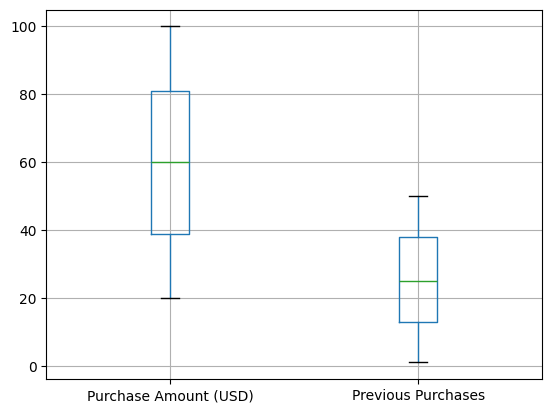

In [24]:
boxplot = df2_input.boxplot(column = ['Purchase Amount (USD)', 'Previous Purchases'])
plt.show()

No outliers found in numerical variables.

### 2. K-Means Clustering

In [25]:
# Silhoutte score
distortions = []
K = range(2, 10)
for k in K:
    kmeansModel = KMeans(n_clusters = k)
    cluster_label = kmeansModel.fit_predict(df2_input)
    silhouette_avg = silhouette_score(df2_input, cluster_label)
    print(
        "For n_clusters =", k ,
        "The average silhouette_score is :",silhouette_avg,
        )
    distortions.append(kmeansModel.inertia_)

For n_clusters = 2 The average silhouette_score is : 0.4517823854318918
For n_clusters = 3 The average silhouette_score is : 0.38551454861789786
For n_clusters = 4 The average silhouette_score is : 0.3560200926263365
For n_clusters = 5 The average silhouette_score is : 0.3720136217484375
For n_clusters = 6 The average silhouette_score is : 0.36956237667377695
For n_clusters = 7 The average silhouette_score is : 0.3547501513219326
For n_clusters = 8 The average silhouette_score is : 0.33407313954737256
For n_clusters = 9 The average silhouette_score is : 0.334128850639047


Based on the silhouette scores, the best choice for the number of clusters appears to be 2.

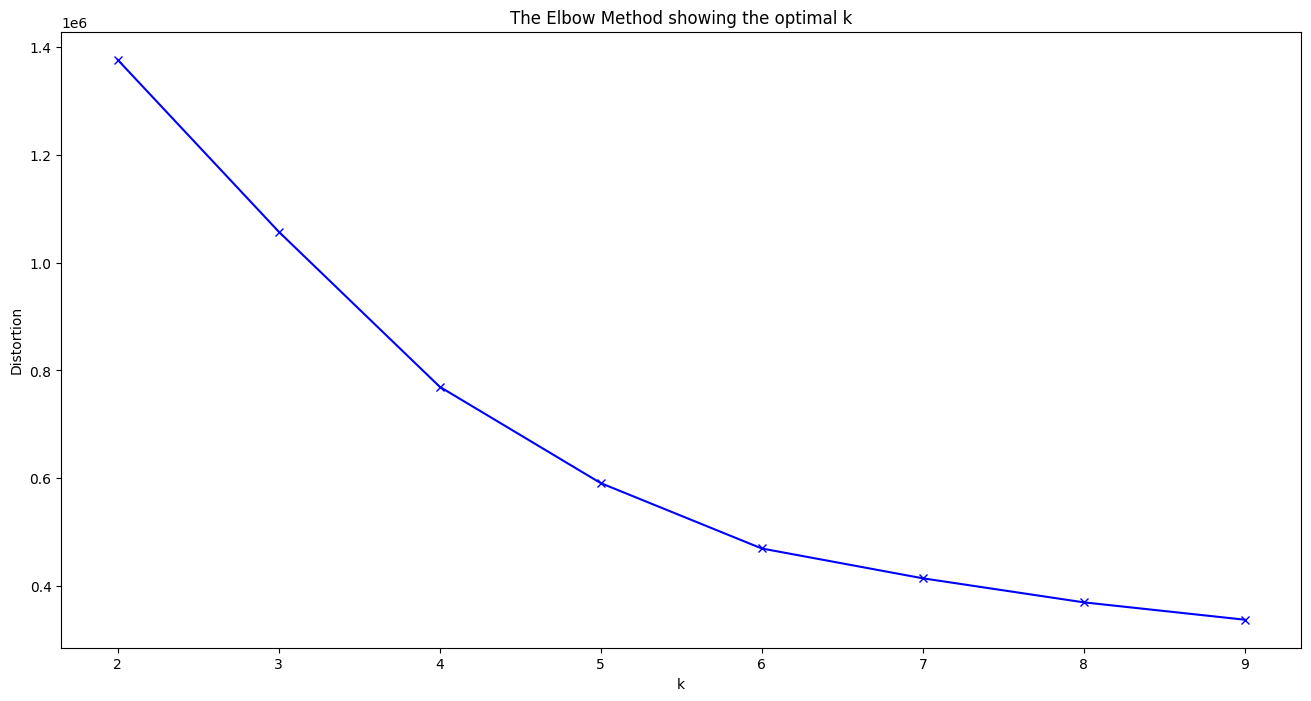

In [26]:
# The Elbow Method
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The Elbow Method didn’t show a clear bend, making it hard to determine the optimal k. So, I will use the optimal k from silhouette score instead, which indicated k=2 as the best choice.

In [27]:
kmeansModel = KMeans(n_clusters=2)
kmeansModel.fit(df2_input)

KMeans(n_clusters=2)

In [28]:
df2_encoded['k_means']=kmeansModel.predict(df2_input)
df2_encoded['k_means'].value_counts()

,count
k_means,
0,1963
1,1937


In [29]:
df2_encoded.head()

,Gender,Category,Purchase Amount (USD),Location,Season,Subscription Status,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,...,Preferred Payment Method_Credit Card,Preferred Payment Method_Debit Card,Preferred Payment Method_PayPal,Preferred Payment Method_Venmo,Frequency of Purchases_enc,Gender_enc,Subscription Status_enc,Promo Code Used_enc,Discount Applied_enc,k_means
0,Male,Clothing,53,South and Midwest US,Winter,Yes,Yes,Yes,14,Venmo,...,0.0,0.0,0.0,1.0,5.0,1,1,1,1,1
1,Male,Clothing,64,East US,Winter,Yes,Yes,Yes,2,Cash,...,0.0,0.0,0.0,0.0,5.0,1,1,1,1,0
2,Male,Clothing,73,East US,Spring,Yes,Yes,Yes,23,Credit Card,...,1.0,0.0,0.0,0.0,7.0,1,1,1,1,0
3,Male,Footwear,90,East US,Spring,Yes,Yes,Yes,49,PayPal,...,0.0,0.0,1.0,0.0,7.0,1,1,1,1,0
4,Male,Clothing,49,West US,Spring,Yes,Yes,Yes,31,PayPal,...,0.0,0.0,1.0,0.0,1.0,1,1,1,1,1


**Plot of the clustered data**

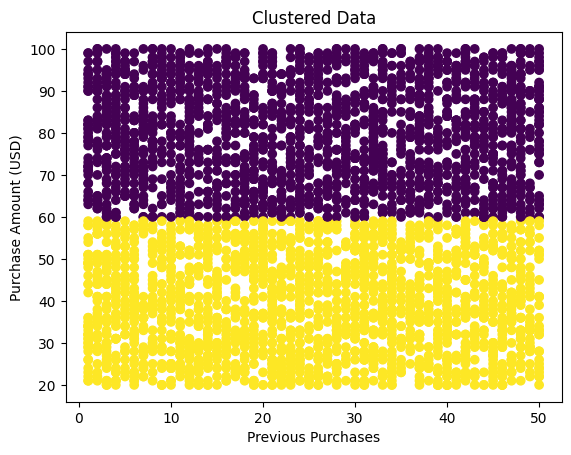

In [30]:
plt.scatter(x = df2_encoded['Previous Purchases'], y = df2_encoded['Purchase Amount (USD)'], c = df2_encoded['k_means'])
plt.title('Clustered Data')
plt.xlabel('Previous Purchases')
plt.ylabel('Purchase Amount (USD)')
plt.show()

### 3. Persona Analysis

In [31]:
cluster_0 = df2_encoded[df2_encoded['k_means']==0]
cluster_1 = df2_encoded[df2_encoded['k_means']==1]

In [32]:
cluster_0.columns

Index(['Gender', 'Category', 'Purchase Amount (USD)', 'Location', 'Season',
       'Subscription Status', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases', 'Category_Accessories', 'Category_Clothing',
       'Category_Footwear', 'Category_Outerwear', 'Location_East US',
       'Location_Midwest & Mountain US', 'Location_Pennsylvania',
       'Location_South and Midwest US', 'Location_West US', 'Season_Fall',
       'Season_Spring', 'Season_Summer', 'Season_Winter',
       'Preferred Payment Method_Bank Transfer',
       'Preferred Payment Method_Cash', 'Preferred Payment Method_Credit Card',
       'Preferred Payment Method_Debit Card',
       'Preferred Payment Method_PayPal', 'Preferred Payment Method_Venmo',
       'Frequency of Purchases_enc', 'Gender_enc', 'Subscription Status_enc',
       'Promo Code Used_enc', 'Discount Applied_enc', 'k_means'],
      dtype='object')

In [33]:
num_features_0 = cluster_0[['Purchase Amount (USD)', 'Previous Purchases']]

In [34]:
num_features_1 = cluster_1[['Purchase Amount (USD)', 'Previous Purchases']]

In [35]:
num_features_0.describe()

,Purchase Amount (USD),Previous Purchases
count,1963.000000,1963.000000
mean,80.227713,25.534896
std,11.858906,14.609675
min,60.000000,1.000000
25%,70.000000,13.000000
50%,80.000000,25.000000
75%,91.000000,38.000000
max,100.000000,50.000000


**Average**
*   Purchase Amount = $80.23
*   Previous Purchases = 25.5

In [36]:
num_features_1.describe()

,Purchase Amount (USD),Previous Purchases
count,1937.000000,1937.000000
mean,39.026329,25.165720
std,11.507401,14.281877
min,20.000000,1.000000
25%,29.000000,13.000000
50%,38.000000,25.000000
75%,49.000000,37.000000
max,59.000000,50.000000


**Average**
*   Purchase Amount = $39.03
*   Previous Purchases = 25.2



In [37]:
cat_features_0 = cluster_0[['Category', 'Location', 'Season', 'Preferred Payment Method', 'Gender', 'Subscription Status',
       'Promo Code Used', 'Discount Applied']]

In [38]:
cat_features_1 = cluster_1[['Category', 'Location', 'Season', 'Preferred Payment Method', 'Gender', 'Subscription Status',
       'Promo Code Used', 'Discount Applied']]

In [39]:
# Comparison of value counts (categorical variables of cluster 0 and cluster 1)
for col in cat_features_0.columns:
    comparison = pd.concat(
        [cat_features_0[col].value_counts(), cat_features_1[col].value_counts()],
        axis=1,
        keys=['cat_features', 'cat_features_1']
    )
    print(comparison.fillna(0))
    print("-" * 40)

             cat_features  cat_features_1
Category                                 
Clothing              889             848
Accessories           625             615
Footwear              307             292
Outerwear             142             182
----------------------------------------
                       cat_features  cat_features_1
Location                                           
Midwest & Mountain US           587             581
South and Midwest US            512             512
West US                         462             400
East US                         354             418
Pennsylvania                     48              26
----------------------------------------
        cat_features  cat_features_1
Season                              
Fall             511             464
Winter           505             466
Spring           492             507
Summer           455             500
----------------------------------------
                          cat_features 

Overall, for the categorical variables, there are no significant differences between the two clusters, unlike with the numerical variables earlier.

**Persona Analysis Summary**

* **Cluster 0: Premium Shoppers**

  Average purchase amount: $80.23


  This group spends more per purchase and likely prefers higher-quality or premium items. They might respond well to exclusive offers, loyalty rewards, or premium product promotions.

* **Cluster 1: Budget Shoppers**

  Average purchase amount: $39.03


  This group prefers lower-priced items and is likely more price-sensitive. Discounts, bundle deals, or budget-friendly promotions would appeal to them.

Since other variables show no significant differences, the segmentation mainly reflects spending behavior, helping to tailor pricing and promotional strategies for each cluster.

### **Presentation video**
Link: https://drive.google.com/file/d/1LOYaykReHVPdNqa_T7OmoFaqJu4HzvXU/view?usp=sharing